In [11]:
import pymrio as mr
import pandas as pd
import numpy as np
from scipy.linalg import block_diag
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import country_converter as coco
import geopandas

%matplotlib inline

In [ ]:
sns.

### Usual IO stuff

In [2]:
EXIOBASE_PATH = '../EXIOBASE/' # ne pas hésiter à changer

In [3]:
year = 2019
filename = EXIOBASE_PATH+'IOT_{}_ixi.zip'.format(year)

In [4]:
io = mr.parse_exiobase3(path=filename)

In [5]:
population = pd.read_csv(EXIOBASE_PATH+'exiobase_population.txt',sep='\t',index_col=0)
io.population=pd.DataFrame(columns=['population'], data=population.loc[year].values, index=population.columns).T

In [6]:
io.calc_all()

C:\Users\Gibon\.conda\envs\io\lib\site-packages\pymrio\core\mriosystem.py:878: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  Y_agg = Y.sum(level="region", axis=1).reindex(
C:\Users\Gibon\.conda\envs\io\lib\site-packages\pymrio\core\mriosystem.py:928: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  F_Y_agg = self.F_Y.sum(level="region", axis=1).reindex(


### Map things

In [213]:
path = geopandas.datasets.get_path('naturalearth_lowres')
df_raw = geopandas.read_file(path)

In [238]:
path = '../data/worldmap/CNTR_RG_01M_2020_4326.shp'
df_raw = geopandas.read_file(path)

In [239]:
path = '../data/worldmap/CNTR_LB_2020_4326.shp'
df_points = geopandas.read_file(path)
df_points = df_points[['ISO3_CODE','geometry']].set_index('ISO3_CODE')
df_points.columns = ['point']

In [240]:
standard_names = coco.convert(names=io.get_regions(), to='ISO3')

In [241]:
ind = 'Climate change midpoint | ILCD recommended CF | Global warming potential 100 years'
footprints = io.impacts.D_cba_cap.loc[ind].rename({k:v for k,v in zip(io.get_regions(),standard_names)}).drop('not found')

In [258]:
df = df_raw.join(footprints, on='ISO3_CODE')
df = df.join(df_points, on='ISO3_CODE')
pd.set_option('display.max_rows', df.shape[0]+1)

In [271]:
df = df.to_crs('EPSG:2154')
df['point'] = df['point'].to_crs('EPSG:2154')

In [272]:
row['point'].coords[0]

(-7553615.028099479, 5773789.792760337)

(5000000.0, 10000000.0)

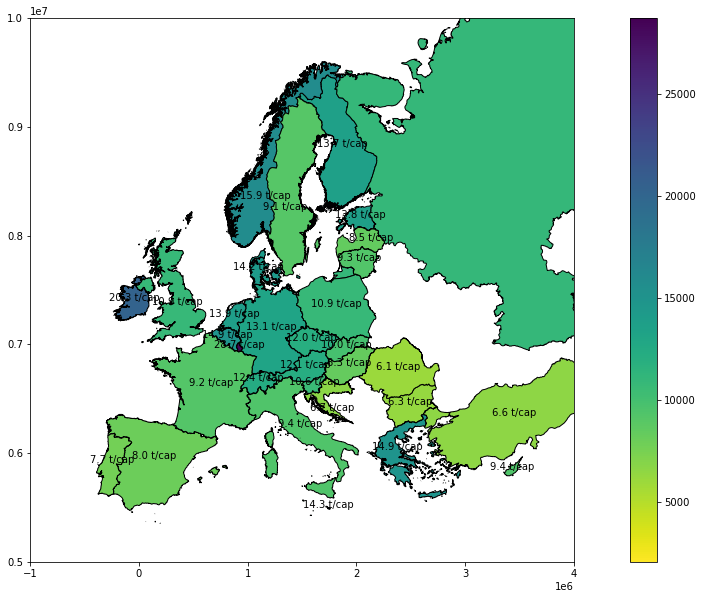

In [275]:
xmin, xmax = (-1e6,4e6)
ymin, ymax = (5e6, 10e6)

ax = df.plot(column=ind, cmap='viridis_r', edgecolor='k', legend=True, figsize=(20,10))
for idx, row in df.iterrows():
    xy = row['point'].coords[0]
    if (xmin < xy[0] < xmax) and (ymin < xy[1] < ymax) and not np.isnan(row[ind]):
        plt.annotate(s=f'{row[ind]/1000:.1f} t/cap',
                     xy=row['point'].coords[0],
                     horizontalalignment='center')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
